In [95]:
# What have we learned about facing the effects of a pandemic, globally?
    # Poorer Countries are the hardest hit when it comes to a pandemic
    #Calculate possible causes for excess deaths
    # Second Tier countries appear to be hit the hardest by COVID
    # Poor Countries, which are largely countries in africa, likely lack the resources to properly report cases
    # 
    # Some external factors are better correlated with deaths than others
# Are we better prepared for the NEXT health crisis?

# When looking at the Bloomberg and Oxford studies consider how the rankings were constructed. 

# What data did they use? How can we characterize responses? What is the range of responses
# across countries? Based on our analysis, what advice can we give our colleagues in other countries?”


In [292]:
bob=pd.read_csv('bloomberg.csv',header=1)

In [ ]:
#Don't Worry about this, these are just notes!!


# test_vector=bob['UNIVERSAL HEALTHCARE COVERAGE']+bob['PEOPLE COVERED BY VACCINES']*1.1
# test_vector=test_vector+bob['2021 GDP GROWTH FORECAST']-(bob['POSITIVE TEST RATE']*2.5)
# test_vector=test_vector+bob['COMMUNITY MOBILITY']-(bob['3-MONTH CASE FATALITY RATE']*8.6)-pow(bob['1-MONTH CASES PER 100,000'],1/2.1)
# test_vector=test_vector+(bob['VACCINATED TRAVEL ROUTES']/4.5)
# round(float(np.corrcoef(test_vector,bob['BLOOMBERG RESILIENCE SCORE'])[:1,1]),4)
#.9232

In [243]:
#PURPOSE:importing packages, which are basically just add-ons to make our lives easier, these ones are used for doing
# some math

from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
import math
import pandas as pd


#PURPOSE:This is a function I wrote just for stripping characters from different entries so they can be an int data type
# I called the functions on the rows that I wanted to strip
def r_stripper(name):
    bob[name]=bob[name].str.rstrip('%')
    bob[name]=bob[name].str.replace("—","0") 
    bob[name]=bob[name].str.replace(",",'')
    bob[name]=bob[name].astype(float)
bob=pd.read_csv('bloomberg.csv',header=1)
r_stripper('PEOPLE COVERED BY VACCINES')
r_stripper('FLIGHT CAPACITY')
r_stripper('POSITIVE TEST RATE')
r_stripper('COMMUNITY MOBILITY')
r_stripper('UNIVERSAL HEALTHCARE COVERAGE')
r_stripper('TOTAL DEATHS PER 1 MILLION')
r_stripper('2021 GDP GROWTH FORECAST')
r_stripper('1-MONTH CASES PER 100,000')
r_stripper('3-MONTH CASE FATALITY RATE')

#PURPOSE: 
# Filter the numerical data, so bascially this is taking each column and giving it a ranking by percentile
# highest value in a column-->1 second highest --> (1-(1/50)) last -->0 and so on
df=bob
df_fix = df[[col for col in list(df.columns) if col in ['3-MONTH CASE FATALITY RATE','2021 GDP GROWTH FORECAST','UNIVERSAL HEALTHCARE COVERAGE','RANK', 'BLOOMBERG RESILIENCE SCORE','PEOPLE COVERED BY VACCINES','LOCKDOWN SEVERITY','FLIGHT CAPACITY','VACCINATED TRAVEL ROUTES','POSITIVE TEST RATE','COMMUNITY MOBILITY','HUMAN DEVELOPMENT INDEX','TOTAL DEATHS PER 1 MILLION']]]

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(data = scaler.fit_transform(df_fix),
                         columns = df_fix.columns)

#PURPOSE: so this is me just bascially plugging in columns and then comparing that number ranking to the actual
#number ranking, and then checking correlation coefficient, for more information
# https://www.scribbr.com/statistics/correlation-coefficient/
test_vector=0
test_vector=bob['UNIVERSAL HEALTHCARE COVERAGE']+bob['PEOPLE COVERED BY VACCINES']*1.1
test_vector=test_vector+bob['2021 GDP GROWTH FORECAST']-(bob['POSITIVE TEST RATE']*2.5)
test_vector=test_vector+bob['COMMUNITY MOBILITY']-(bob['3-MONTH CASE FATALITY RATE']*8.6)-pow(bob['1-MONTH CASES PER 100,000'],1/2.1)
test_vector=test_vector+(bob['VACCINATED TRAVEL ROUTES']/4.5)
round(float(np.corrcoef(test_vector,bob['BLOOMBERG RESILIENCE SCORE'])[:1,1]),4)

0.9232

In [ ]:
#quality
test_vector=bob['UNIVERSAL HEALTHCARE COVERAGE']+bob['2021 GDP GROWTH FORECAST']


In [242]:
bob

,RANK,CHANGE,ECONOMY,BLOOMBERG RESILIENCE SCORE,PEOPLE COVERED BY VACCINES,LOCKDOWN SEVERITY,FLIGHT CAPACITY,VACCINATED TRAVEL ROUTES,"1-MONTH CASES PER 100,000",3-MONTH CASE FATALITY RATE,TOTAL DEATHS PER 1 MILLION,POSITIVE TEST RATE,COMMUNITY MOBILITY,2021 GDP GROWTH FORECAST,UNIVERSAL HEALTHCARE COVERAGE,HUMAN DEVELOPMENT INDEX
0,1,–,Ireland,75.1,73.8,42,-44.2,396.0,953.0,0.2,1087.0,8.6,-12.0,14.8,90.0,0.96
1,2,–,Spain,74.6,76.7,41,-24.4,397.0,119.0,0.9,1865.0,2.2,-13.1,5.5,90.0,0.90
2,3,▲3,U.A.E.,74.6,97.3,39,-39.6,398.0,45.0,0.3,215.0,0.0,-0.2,2.3,63.0,0.89
3,4,▲1,Denmark,74.3,76.1,24,-37.6,306.5,371.0,0.2,466.0,1.5,-2.1,3.3,84.0,0.94
4,5,▼1,Finland,74.2,72.6,24,-59.3,396.0,279.0,0.3,208.0,5.2,-11.8,3.2,91.0,0.94
5,6,▲4,Norway,73.1,73.9,20,-27.2,195.0,267.0,0.1,165.0,5.5,-6.3,3.7,94.0,0.96
6,7,–,France,71.5,75.5,67,-34.5,397.0,219.0,0.6,1815.0,1.2,-8.7,6.1,91.0,0.90
7,8,▲23,Chile,71.4,92.4,32,-21.5,274.0,166.0,3.5,1971.0,2.5,1.0,10.6,74.0,0.85
8,9,▼1,Switzerland,71.3,64.2,46,-37.4,396.0,373.0,0.3,1293.0,5.2,-11.8,3.4,93.0,0.96
9,10,▼7,Netherlands,71.3,69.3,42,-31.0,397.0,543.0,0.3,1095.0,7.9,-9.9,3.8,90.0,0.94


In [61]:
a=90.0
b=73.8
c=14.8
d=8.6
e= -12
f= .2
g=953.0
h=396.0
t=(a+b)/2 + (c*.1) - (3*d) + e - (5*f) - pow(g,0.25) + (h/10)
t

78.6238594257465

In [48]:
test_vector.sort_values(ascending=False)

2     117.959980
6     111.103099
3     103.511223
1     103.247166
10    102.115298
0     100.543859
14     99.735786
16     97.705630
13     97.345658
4      96.813034
7      96.110557
18     95.632219
19     95.103235
30     94.237158
17     93.632082
8      93.505320
23     93.022561
9      91.122748
41     90.997672
24     90.383585
27     90.250000
15     90.119457
21     89.356948
12     88.668610
35     85.601171
28     85.416134
5      85.307707
11     84.721418
26     84.609302
22     84.582596
34     84.171721
31     80.635264
25     76.048402
42     72.717879
29     69.135629
39     69.017879
38     66.373561
33     65.580662
32     64.327581
36     62.210061
37     59.351001
43     56.983926
20     56.060793
44     45.883674
49     42.241419
46     34.300000
45     34.207412
47     33.788790
40     29.004127
48     23.796288
50     21.706899
52      2.735629
51      0.060209
dtype: float64

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
var1= 'total_deaths_per_million'
var2='population_density'
workbook = pd.read_csv('data1.csv')
# final=workbook.loc[:,[var1,var2,'iso_code']].dropna()
# final=final.groupby('iso_code').max(var2)
# sns.regplot(y=final[var1],x=final[var2],color='red')
workbook
# for column1 in bob.columns:
#     for column2 in bob.columns:
#         if(column1 != column2):
#             final=workbook.loc[:,[column1,column2,'iso_code']].dropna()
#             final=final.groupby('iso_code').max(column1)
#             corel=np.corrcoef(final[column1],final[column2])
#             corel=round(corel[0,1],2)
#             if(corel > .70):
#                 print(corel,column1,column2)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154906,ZWE,Africa,Zimbabwe,1/11/2022,223000.0,0.0,760.286,5180.0,0.0,14.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
154907,ZWE,Africa,Zimbabwe,1/12/2022,224433.0,1433.0,768.000,5215.0,35.0,17.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
154908,ZWE,Africa,Zimbabwe,1/13/2022,225084.0,651.0,700.857,5222.0,7.0,16.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
154909,ZWE,Africa,Zimbabwe,1/14/2022,225637.0,553.0,622.143,5238.0,16.0,14.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


KeyError: 'stringency index'

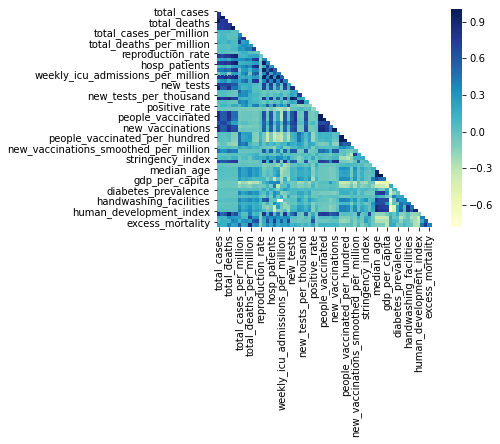

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
mask = np.zeros_like(workbook.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(workbook.corr(),cmap="YlGnBu",square=True,mask=mask)
workbook.corr()['stringency index']

In [43]:
workbook.dtypes == 'float64'

iso_code                                   False
continent                                  False
location                                   False
date                                       False
total_cases                                 True
                                           ...  
human_development_index                     True
excess_mortality_cumulative_absolute        True
excess_mortality_cumulative                 True
excess_mortality                            True
excess_mortality_cumulative_per_million     True
Length: 67, dtype: bool

In [181]:
correlation_df=workbook.corr()
correlation_df.to_csv(path_or_buf='corr.csv',float_format='%.4f')

In [1]:
workbook.columns

NameError: name 'workbook' is not defined

0.8026168574650834 excess_mortality hosp_patients_per_million


<AxesSubplot:xlabel='excess_mortality', ylabel='hosp_patients_per_million'>

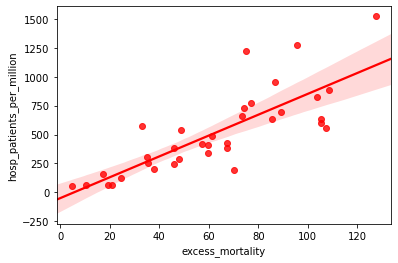

In [123]:
column1= 'excess_mortality'
maax=0
maxOne=""
maxTwo=""
for column2 in bob.columns:
    if(column1 != column2):
        final=workbook.loc[:,[column1,column2,'iso_code']].dropna()
        final=final.groupby('iso_code').max(column2)
        corel=np.corrcoef(final[column1],final[column2])
        coeff=corel[0,1]
        if(coeff > maax):
            maax=coeff
            maxOne=column1
            maxTwo=column2
print(maax,maxOne,maxTwo)
final=workbook.loc[:,[maxOne,maxTwo,'iso_code']].dropna()
final=final.groupby('iso_code').max(maxTwo)
sns.regplot(y=final[maxTwo],x=final[maxOne],color='red')

In [109]:
workbook['handwashing_facilities'].dropna()

0         37.746
1         37.746
2         37.746
3         37.746
4         37.746
           ...  
154906    36.791
154907    36.791
154908    36.791
154909    36.791
154910    36.791
Name: handwashing_facilities, Length: 63887, dtype: float64

array([[ 1.        , -0.43168263],
       [-0.43168263,  1.        ]])

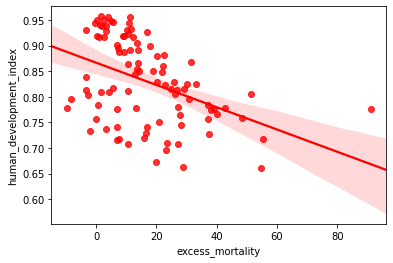

In [183]:
final=workbook.loc[:,['human_development_index','excess_mortality','iso_code']].dropna()
final=final.groupby('iso_code').mean('excess_mortality')
sns.regplot(y=final['human_development_index'],x=final['excess_mortality'],color='red')
np.corrcoef(final['excess_mortality'],final['human_development_index'])

In [ ]:
final=workbook.loc[:,['human_development_index','total_deaths_per_million','iso_code']].dropna()
final=final.groupby('iso_code').mean('total_deaths_per_million')
sns.regplot(x=final['human_development_index'],y=final['total_deaths_per_million'],color='red')
np.corrcoef(final['total_deaths_per_million'],final['human_development_index'])


In [127]:
#relevant finds
# 0.76 cardiovasc_death_rate hosp_patients_per_million

#0.52 male_smokers hosp_patients_per_million

# 0.73 female_smokers aged_65_older

# 0.96 new_deaths hosp_patients

#-0.5756315054269601 gdp_per_capita hosp_patients_per_million

#0.37 reproduction_rate human_development_index

#-0.78 hosp_patients_per_million new_vaccinations_smoothed_per_million

#-0.75 extreme_poverty handwashing_facilities

In [130]:
dir(np)

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__dir__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__git_revision__',
 '__loader__',
 '__mkl_version__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_ad

In [115]:
final=workbook.loc[:,['date',var1,var2,'iso_code']].dropna()
final

,date,total_deaths_per_million,total_cases_per_million,iso_code
28,3/23/2020,0.025,1.004,AFG
29,3/24/2020,0.025,1.054,AFG
30,3/25/2020,0.025,1.858,AFG
31,3/26/2020,0.050,2.008,AFG
32,3/27/2020,0.050,2.284,AFG
...,...,...,...,...
154906,1/11/2022,343.224,14775.873,ZWE
154907,1/12/2022,345.543,14870.823,ZWE
154908,1/13/2022,346.007,14913.958,ZWE
154909,1/14/2022,347.067,14950.599,ZWE


<AxesSubplot:xlabel='human_development_index', ylabel='total_cases_per_million'>

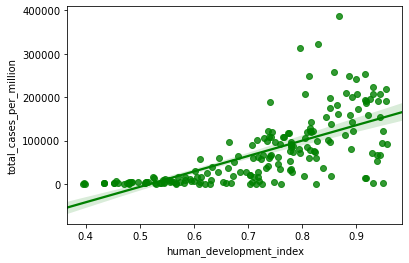

In [140]:
var
sns.regplot(y=var['total_cases_per_million'],x=var['human_development_index'],color='green')

In [108]:
# very high human development (0.8-1.0)
# array([[1.        , 0.09132327],
#        [0.09132327, 1.        ]])
# high human development (0.7-0.79)
# array([[1.        , 0.40545535],
#        [0.40545535, 1.        ]])
# medium human development (0.55-. 70)
# array([[1.        , 0.51311565],
#        [0.51311565, 1.        ]])
# and low human development (below 0.55).
# array([[1.        , 0.42181529],
#        [0.42181529, 1.        ]])

In [70]:
import pandas as pd
oxford = pd.read_csv('data2.csv')
oxford[oxford['CountryName'] == 'Zimbabwe']

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
138380,Zimbabwe,ZWE,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
138381,Zimbabwe,ZWE,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
138382,Zimbabwe,ZWE,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
138383,Zimbabwe,ZWE,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
138384,Zimbabwe,ZWE,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139123,Zimbabwe,ZWE,20220113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,52.78,NaN,63.1,NaN,54.17,NaN,61.9,NaN,0.0
139124,Zimbabwe,ZWE,20220114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,52.78,NaN,63.1,NaN,54.17,NaN,61.9,NaN,0.0
139125,Zimbabwe,ZWE,20220115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,52.78,NaN,63.1,NaN,54.17,NaN,61.9,NaN,0.0
139126,Zimbabwe,ZWE,20220116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,52.78,NaN,63.1,NaN,54.17,NaN,61.9,NaN,0.0
